In [352]:
import os
from glob import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.backend as K

In [188]:
os.listdir('ADE20K_2017_05_30_consistency/images/consistencyanalysis')

['original_ade20k',
 'repeat_ade20k',
 'repeat_participant1',
 'repeat_participant2',
 'repeat_participant3']

In [189]:
image_list = glob('ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*.jpg')
label_list = glob('ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*.png')

In [190]:
image_list , len(image_list)

(['ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dfmtscjlgpxnxvg.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dvkvazcsyvkumig.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_fbpgpaxesdmtnqy.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_hueaxalkegppjob.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_ksbcdzlsogcuudh.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_kvyxvreglagziop.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_nxqdbafndbozeee.jpg',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_rbjlgswhtdvdpju.jpg',
  'ADE20K_2017_05_30_consistency/imag

In [191]:
label_list, len(label_list)

(['ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf_parts_1.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dfmtscjlgpxnxvg_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dvkvazcsyvkumig_parts_1.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dvkvazcsyvkumig_parts_2.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dvkvazcsyvkumig_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_fbpgpaxesdmtnqy_parts_1.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_fbpgpaxesdmtnqy_parts_2.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_fbpgpax

label datasets 의 크기가 좀 다르고 part1 등 이상한것들이 껴있다 여기서 우리는 그냥 seg만 가져와보자

In [192]:
label_list = glob('ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*_seg.png')

In [193]:
label_list , len(label_list)

(['ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dfmtscjlgpxnxvg_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_dvkvazcsyvkumig_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_fbpgpaxesdmtnqy_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_hueaxalkegppjob_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_ksbcdzlsogcuudh_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_kvyxvreglagziop_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_nxqdbafndbozeee_seg.png',
  'ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_rbjlgswhtdvdpju_seg.png',
 

In [237]:
image = np.array(Image.open(image_list[0]))
label = np.array(Image.open(label_list[0]))

image.shape, label.shape

((960, 1280, 3), (960, 1280, 3))

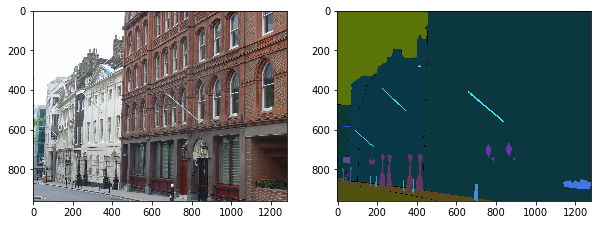

In [238]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(label)

plt.show()

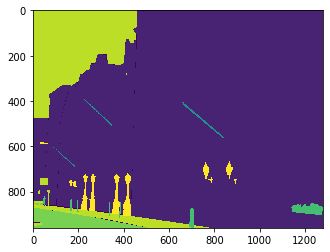

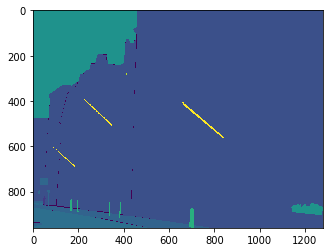

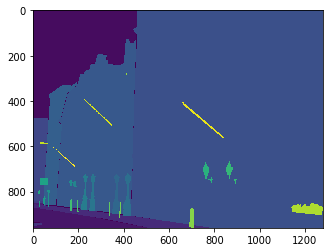

In [239]:
for c in range(3) :
    plt.imshow(label[:,:,c])
    plt.show()

위 그림을 보면 1,2는 건물의 색이 모두 같고, 3번쨰는 건물의 색이 모두 다르다.  
1,2 는 sementic segmentation  
3 은 instance segmentation 으로 볼수 있따.

이 예제에서는 sementic segmentation 만 다루도록 한다.

In [240]:
first_c = label[:,:,0]
second_c = label[:,:,1]

In [241]:
np.unique(first_c)

array([  0,  10,  50,  70,  80,  90, 100], dtype=uint8)

In [242]:
np.unique(second_c)

array([  0,  39,  56,  73,  76,  83, 116, 118, 144, 205, 228], dtype=uint8)

In [243]:
unique_list = []
for lbl in label_list :
    
    label_channels = np.array(Image.open(lbl))
    
    for label in np.unique(label_channels[:,:,0]) :
        if label not in unique_list :
            unique_list.append(label)
        

In [ ]:
# Label one-hot encodding 해주기

tf.__version__

In [345]:
len(unique_list)

13

In [346]:
def data_process(img_path, lbl_path) :
    
    img_gfile = tf.io.read_file(img_path)
    
    # tf.io.decode_image 를 쓰려면 expand_animations=False 를 해줘야 한다.
    # 이걸 안쓰려면 tf.io.decode_jpeg 라고 확실히 명시
    image = tf.io.decode_image(img_gfile, expand_animations=False) / 255
    image = tf.image.resize(image, (512,512)) 
    
    
    label_gfile = tf.io.read_file(lbl_path)
    label = tf.io.decode_png(label_gfile)
    
    label_c, _ = tf.split(label, [1,-1], axis=-1)
    label_c = tf.image.resize(label_c, [512,512], 'nearest')
    label = tf.squeeze(label_c)
    
    
    label_onehot = tf.one_hot(label,len(unique_list))
    
    return image, label_onehot

In [347]:
dataset = tf.data.Dataset.from_tensor_slices((image_list,label_list))
dataset = dataset.map(data_process)

In [348]:
img,label = next(iter(dataset))
img.shape, label.shape

(TensorShape([512, 512, 3]), TensorShape([512, 512, 13]))

In [349]:
np.min(img),np.max(img)

(0.00055147056, 1.0)

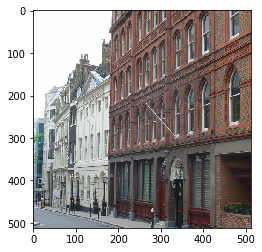

In [350]:
plt.imshow(img)